# 수행목표
- 영화 장르간 상관 관계를 확인하고 시각화한다.
# 수행단계
- 상관 관계 탐색
- 영화의 장르간 상관 관계를 파악하라. (Heatmap) (힌트, pivot)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
movies = pd.read_csv('data/kmrd/movies.txt', sep='\t')  # 혹은 sep=','가 아니라 '\t'라면 tab 구분
rates = pd.read_csv('data/kmrd/rates.csv')
genres = pd.read_csv('data/kmrd/genres.csv')

In [5]:
movies.head(), rates.head(), genres.head()

(   movie                 title                           title_eng    year  \
 0  10001                시네마 천국              Cinema Paradiso , 1988  2013.0   
 1  10002              빽 투 더 퓨쳐           Back To The Future , 1985  2015.0   
 2  10003            빽 투 더 퓨쳐 2    Back To The Future Part 2 , 1989  2015.0   
 3  10004            빽 투 더 퓨쳐 3  Back To The Future Part III , 1990  1990.0   
 4  10005  스타워즈 에피소드 4 - 새로운 희망                    Star Wars , 1977  1997.0   
 
      grade  
 0   전체 관람가  
 1  12세 관람가  
 2  12세 관람가  
 3   전체 관람가  
 4       PG  ,
    user  movie  rate        time
 0     0  10003     7  1494128040
 1     0  10004     7  1467529800
 2     0  10018     9  1513344120
 3     0  10021     9  1424497980
 4     0  10022     7  1427627340,
    movie   genre
 0  10001     드라마
 1  10001  멜로/로맨스
 2  10002      SF
 3  10002     코미디
 4  10003      SF)

In [26]:
# 1) genres + rates 조인 (movie 기준)
merged = pd.merge(rates, genres, on='movie', how='inner')
#   => merged에는 [user, movie, rate, time, genre] 열이 존재

# 2) 사용자-장르별 평균 평점 계산
user_genre_rate = merged.groupby(['user', 'genre'])['rate'].mean().reset_index()
#   => user, genre, rate(=해당 사용자-장르 조합에 대한 평균평점)

# 3) Pivot 테이블로 변환 (행=사용자, 열=장르, 값=평균 평점)
genre_matrix = user_genre_rate.pivot(
    index='user',
    columns='genre',
    values='rate'
)

# 필요하면 결측값(NaN)을 0 등으로 대체
genre_matrix = genre_matrix.fillna(0)

genre_matrix.head()

genre,SF,가족,공포,느와르,다큐멘터리,드라마,멜로/로맨스,모험,뮤지컬,미스터리,범죄,서부,서사,스릴러,애니메이션,액션,에로,전쟁,코미디,판타지
user,,,,,,,,,,,,,,,,,,,,
0,7.818182,7.333333,9.000000,8.5,0.0,7.266667,7.315789,7.000000,6.750000,8.000000,8.285714,6.666667,0.0,8.333333,7.0,7.291667,0.0,7.0,6.933333,6.833333
1,0.000000,0.000000,0.000000,0.0,0.0,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,7.250000,0.000000,7.800000,0.0,0.0,7.571429,9.666667,8.000000,0.000000,0.000000,0.000000,10.000000,0.0,7.333333,0.0,7.250000,0.0,9.0,8.000000,8.500000
3,8.000000,7.000000,8.333333,0.0,0.0,7.410714,7.285714,7.666667,7.666667,8.333333,8.666667,9.500000,0.0,7.611111,0.0,7.533333,3.0,7.0,7.454545,7.600000
4,5.000000,4.500000,7.000000,4.0,0.0,6.906977,7.083333,6.800000,9.000000,6.666667,6.333333,7.000000,0.0,7.000000,2.0,6.181818,0.0,7.8,6.666667,8.750000


In [27]:
genre_corr = genre_matrix.corr()

genre_corr

genre,SF,가족,공포,느와르,다큐멘터리,드라마,멜로/로맨스,모험,뮤지컬,미스터리,범죄,서부,서사,스릴러,애니메이션,액션,에로,전쟁,코미디,판타지
genre,,,,,,,,,,,,,,,,,,,,
SF,1.000000,0.167283,0.262066,0.043353,-0.003874,-0.266573,-0.086301,0.163136,0.003621,0.099983,0.021789,0.137757,0.034479,0.471431,0.119058,0.505782,0.024154,0.065878,0.212407,0.222518
가족,0.167283,1.000000,0.097802,0.070470,-0.002305,-0.121868,0.057283,0.645417,0.173705,0.107437,0.358301,0.103102,0.062088,0.065681,0.351542,0.032279,0.037663,0.085845,0.493339,0.279323
공포,0.262066,0.097802,1.000000,0.111390,-0.002703,-0.085460,0.116254,0.106582,0.053084,0.282556,0.180932,0.119618,0.068832,0.396787,0.060589,0.222254,0.041717,0.119780,0.087555,0.282635
느와르,0.043353,0.070470,0.111390,1.000000,0.011677,0.124882,0.038210,0.064549,0.050073,0.113598,0.337886,0.110992,0.076230,0.071986,0.056303,0.315880,0.042032,0.135930,0.046997,0.092415
다큐멘터리,-0.003874,-0.002305,-0.002703,0.011677,1.000000,0.005307,0.002372,0.004582,-0.002080,-0.001403,0.003693,-0.001234,-0.000882,0.002978,-0.000849,0.001661,-0.000243,-0.001925,0.003666,0.005577
드라마,-0.266573,-0.121868,-0.085460,0.124882,0.005307,1.000000,0.251318,-0.046587,0.182606,0.082032,0.145280,0.059942,0.101607,-0.086091,-0.035816,-0.118135,0.005502,0.209159,-0.163455,-0.104372
멜로/로맨스,-0.086301,0.057283,0.116254,0.038210,0.002372,0.251318,1.000000,0.097283,0.426491,0.071874,0.001896,0.062325,0.023640,-0.070287,0.099587,-0.048336,0.033809,0.146295,0.130192,0.333880
모험,0.163136,0.645417,0.106582,0.064549,0.004582,-0.046587,0.097283,1.000000,0.113029,0.120400,0.307686,0.210131,0.059061,0.087233,0.142219,0.182998,0.033772,0.130003,0.353961,0.356802
뮤지컬,0.003621,0.173705,0.053084,0.050073,-0.002080,0.182606,0.426491,0.113029,1.000000,0.083520,0.027281,0.093233,0.054672,-0.000700,0.216984,-0.042025,0.028321,0.092003,0.113179,0.131286


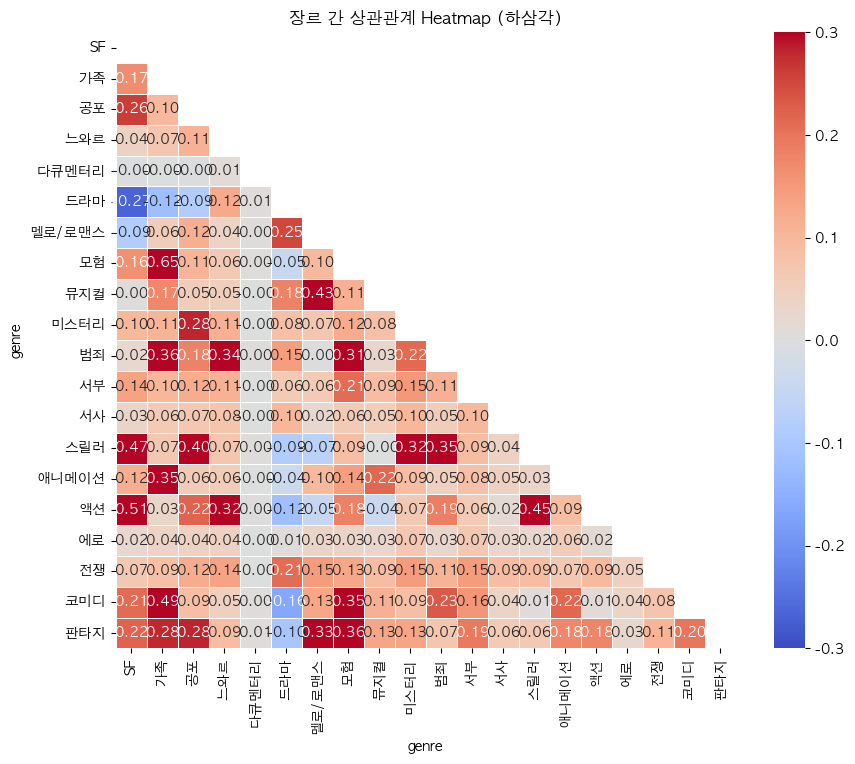

In [30]:
# 4) 히트맵 그리기
# 대각선 기준 좌하단만 표시
import numpy as np

mask = np.triu(np.ones_like(genre_corr, dtype=bool))
#   => 위쪽 삼각형(대각 포함)을 True로 만들어서 가리겠다 (lower-tri만 보이도록)

plt.figure(figsize=(10, 8))
sns.heatmap(
    genre_corr,
    mask=mask,           # 마스크 적용 → 하삼각만 보이도록
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-0.3, vmax=0.3,
    linewidths=.5
)
plt.title("장르 간 상관관계 Heatmap (하삼각)")
plt.show()